# **Music Generation**

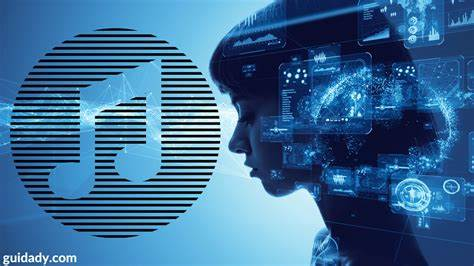

The ***.mid extension*** typically refers to MIDI (Musical Instrument Digital Interface) files. MIDI files are a type of digital audio file that contains instructions for electronic instruments or computer sound cards to play music.


The ***music21 library*** in Python provides powerful tools for working with music notation, including reading and writing MIDI files, manipulating musical elements like notes and chords, and generating musical scores.

**converter:** This module provides functions to convert between different musical formats, such as MIDI files, MusicXML, and Humdrum. You can use it to read MIDI files into music21 objects or export music21 objects to MIDI files.

**instrument:** This module contains classes and functions related to musical instruments. You can use it to create instrument objects and assign them to notes or chords in a musical score.

**note:** This module deals with individual notes in music notation. It provides classes for representing single notes, including their pitch, duration, and other properties.

**chord:** This module is similar to note, but it deals with chords instead of individual notes. It provides classes for representing chords, including their pitches, durations, and other properties.

**stream:** This module represents musical streams, which are sequences of musical elements such as notes, chords, and rests. You can create, manipulate, and analyze musical streams using the functions and classes provided in this module.



We can start working with musical notation in Python using the music21 library. For example, you can read a MIDI file into a music21 stream object using the converter module, manipulate the musical elements in the stream, and then write the modified stream back to a MIDI file. You can also generate new musical scores programmatically by creating and combining note and chord objects in a stream.




In [ ]:
from music21 import converter,instrument,note,chord,stream
import glob
import pickle
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import *
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping,ModelCheckpoint


# Notes:

A note represents a single sound with a specific pitch and duration.
In Western music notation, notes are typically represented by symbols on a staff. The position of the note on the staff indicates its pitch (e.g., higher or lower on the musical scale), and the shape of the note indicates its duration (e.g., quarter note, half note, whole note).
Each note corresponds to a specific frequency of sound waves, determining its pitch. For example, the note "A" typically corresponds to a frequency of 440 Hz.

# Chords:

A chord is a group of two or more notes played simultaneously.
Chords are fundamental to harmony in music and are often used to provide a foundation or structure to a piece of music.
The notes in a chord are typically played together to create a harmonious sound. The combination of notes in a chord determines its quality (e.g., major, minor, diminished) and its overall tonal character.
Chords can be represented using chord symbols (e.g., C major chord is represented by the symbol "C") or by listing the individual notes that comprise the chord (e.g., the C major chord consists of the notes C, E, and G).

In [ ]:
midi = converter.parse("midi_songs/EyesOnMePiano.mid")

In [ ]:
print(midi)

<music21.stream.Score 0x7fb2203e4f10>


In [ ]:
midi.show('midi')

In [ ]:
#midi.show('text')

The midi.flat.notes attribute is used in the music21 library to access all the notes present in a MIDI file, flattened into a single list

In [ ]:
elements_to_parse = midi.flat.notes

/usr/local/lib/python3.10/dist-packages/music21/stream/base.py:3694: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)


In [ ]:
print(len(elements_to_parse))

1555


In [ ]:
i=0
for elem in elements_to_parse:
    print(elem,elem.offset)
    i+=1
    if i==10:
        break

<music21.note.Note A> 0.0
<music21.note.Note A> 0.0
<music21.note.Note A> 0.0
<music21.note.Note A> 0.25
<music21.note.Note G> 2/3
<music21.note.Note G> 2/3
<music21.note.Note F#> 1.0
<music21.note.Note F#> 1.25
<music21.note.Note D> 1.5
<music21.note.Note D> 1.5


It is designed to take a list of musical elements (elements_to_parse) and extract the pitches of individual notes or the normal order of pitches in chords.

If the element is a single note (note.Note), it appends the string representation of its pitch to the notes_demo list.
If the element is a chord (chord.Chord), it appends the normal order of its pitches (represented as integers) joined by '+' to the notes_demo list.

In [ ]:
def generate_notes_and_chords(elements_to_parse,notes_demo=[]):
    for elem in elements_to_parse:
        if isinstance(elem,note.Note):
            notes_demo.append(str(elem.pitch))
        elif isinstance(elem,chord.Chord):
            notes_demo.append('+'.join([str(e) for e in elem.normalOrder]))
    return notes_demo
print(generate_notes_and_chords(elements_to_parse,[])[40:70])

['D4', 'A4', 'E5', 'C#4', 'F#4', 'A4', 'E5', 'C#4', 'F#4', 'C#5', 'A3', 'C#5', 'A3', 'F#4', 'B4', 'G3', 'E4', 'C#5', 'A3', 'F#4', 'B4', 'G3', 'E4', 'C#5', 'A3', 'C#5', 'A3', 'D5', 'B3', 'D5']


The output you provided is a list of pitch representations, which are obtained from a mixture of individual notes and chords. Here's what each entry in the output represents:

'D4', 'A4', 'E5': These are individual notes. Each entry represents the pitch of a single note. For example, 'D4' represents the note D in the fourth octave, 'A4' represents the note A in the fourth octave, and 'E5' represents the note E in the fifth octave.

'C#4', 'F#4', 'A4', 'E5': These are individual notes as well.

'C#4', 'F#4', 'C#5': These are part of a chord. The representation 'C#4+F#4+C#5' indicates that these three pitches are played simultaneously as a chord. Each pitch is represented by its note name followed by its octave number. So, 'C#4' represents the note C# in the fourth octave, 'F#4' represents the note F# in the fourth octave, and 'C#5' represents the note C# in the fifth octave.

'A3', 'C#5', 'A3': These are part of a chord as well.

'F#4', 'B4', 'G3', 'E4', 'C#5', 'A3': These are individual notes.

These pitch representations can be utilized for various types of music analysis, such as:

Melody Analysis: You can analyze the sequence of individual notes to identify patterns, motifs, or melodic contours within a musical piece.

Harmony Analysis: By identifying chords and chord progressions, you can analyze the harmonic structure of a piece. This involves identifying common chord progressions, chord functions, and harmonic rhythm.

Formal Analysis: The distribution and arrangement of notes and chords can provide insights into the formal structure of a musical composition, such as identifying sections (e.g., verses, choruses, bridges) and their relationships.

Genre Classification: Different genres of music often exhibit characteristic patterns in terms of melodic and harmonic content. Analyzing the pitch representations can help classify music into different genres.

Similarity and Contrast Analysis: Comparing pitch sequences between different sections of a piece or between different pieces can reveal similarities and differences, providing insights into musical development and variation.

These are just a few examples of how pitch representations obtained from music analysis can be utilized for deeper understanding and interpretation of musical compositions. Depending on your specific goals and interests, you may choose to focus on different aspects of music analysis.

In [ ]:
notes = []
for file in glob.glob("midi_songs/*.mid"):
    midi = converter.parse(file)
    elements_to_parse = midi.flat.notes
    generate_notes_and_chords(elements_to_parse,notes)

/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=5, channel=None, data=b'Martin Rosok Copyright \xa9 1998'>; getting generic Instrument
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=6, channel=None, data=b'Pok\xe9mon: Elite Four (Piano)'>; getting generic Instrument
  warnings.warn(


In [ ]:
print(notes[:100])

['0+4+7', 'A2', '0+4+7', 'A2', '0+4+7', '0+4+6', 'D3', '0+4+6', '0+4+6', 'D3', '0+4+6', '0+4+7', 'A2', '0+4+7', 'A2', '0+4+7', '0+4+6', 'D3', '0+4+6', '0+4+6', 'D3', '0+4+6', '0+4+7', 'A2', '0+4+7', 'A2', 'A2', '0+4+7', '0+4+6', 'A2', 'D3', '0+4+6', '0+4+6', 'D3', 'D3', 'F#2', '0+4+6', 'G2', 'G#2', '0+4+7', 'A2', '0+4+7', 'A2', 'A2', '0+4+7', '0+4+6', 'A2', 'D3', '0+4+6', '0+4+6', 'D3', 'D3', 'C5', 'E5', 'D5', 'D3', 'D5', 'A2', 'G3', 'A2', 'A2', 'G4', 'G#4', 'A4', 'A2', 'A4', 'D3', 'F#3', 'D3', 'D3', 'E4', 'F#2', 'G4', 'G2', 'A4', 'G#2', 'A4', 'A2', 'G3', 'A4', 'G4', 'A2', 'A4', 'A2', 'C5', 'D5', 'A2', 'D5', 'D3', 'F#3', 'A4', 'D3', 'D3', 'A4', 'C5', 'A2', 'B4', 'G#2', 'B-4', 'G2']


In [ ]:
len(notes)

60778

In [ ]:
pd.DataFrame(notes).to_csv("all_notes.csv",index=False)

In [ ]:
notes = pd.read_csv("all_notes.csv").iloc[:,0].values

In [ ]:
vocab = set(notes)

In [ ]:
n_vocab = len(vocab)
print(n_vocab)

398


In [ ]:
print("Total notes- ", len(notes))
print("Unique notes- ",  len(vocab))

Total notes-  60778
Unique notes-  398


In [ ]:
sequence_length =100

In [ ]:
pitch_name = sorted(vocab)

In [ ]:
ele_to_int = dict((ele,num) for num,ele in enumerate(pitch_name))
int_to_ele = dict((num,ele) for num,ele in enumerate(pitch_name))

For example ele_to_int: {'C': 0, 'D': 1, 'E': 2, 'F': 3, 'G': 4, 'A': 5, 'B': 6}
int_to_ele: {0: 'C', 1: 'D', 2: 'E', 3: 'F', 4: 'G', 5: 'A', 6: 'B'}


In [ ]:
network_input = []
network_output = []
for i in range(len(notes)-sequence_length):
    seq_in = notes[i:i+sequence_length]
    seq_out = notes[i+sequence_length]
    network_input.append([ele_to_int[ch] for ch in seq_in])
    network_output.append([ele_to_int[seq_out]])


Sure, let's use a simple sequence of musical notes to demonstrate how the input-output pairs are generated:

Suppose we have the following sequence of musical notes:

python
Copy code
notes = ['C', 'D', 'E', 'F', 'G', 'A', 'B']
And let's assume sequence_length = 3.

Here's how the input-output pairs would be generated:

For the first input-output pair:

Input sequence: ['C', 'D', 'E']
Target note: 'F'
For the second input-output pair:

Input sequence: ['D', 'E', 'F']
Target note: 'G'
For the third input-output pair:

Input sequence: ['E', 'F', 'G']
Target note: 'A'
For the fourth input-output pair:

Input sequence: ['F', 'G', 'A']
Target note: 'B'
The input sequences are formed by taking consecutive groups of three notes from the original sequence, and the target notes are the notes that immediately follow each input sequence.

So, for the given notes sequence, the generated input-output pairs would be:

python
Copy code
network_input = [['C', 'D', 'E'], ['D', 'E', 'F'], ['E', 'F', 'G'], ['F', 'G', 'A']]
network_output = ['F', 'G', 'A', 'B']


In [ ]:
n_patterns = len(network_input)
print(n_patterns)

60678


The to_categorical() function converts these integer target outputs to one-hot encoded format, which is a common format used for classification tasks in neural networks.

In [ ]:
network_input = np.reshape(network_input,(n_patterns,sequence_length,1))
print(network_input.shape)
network_output = to_categorical(network_output)
print(network_output.shape)

(60678, 100, 1)
(60678, 398)


n_patterns is the total number of input sequences.
sequence_length is the length of each input sequence.
1 indicates that each element of the sequence is a single integer.
This reshaping is often necessary when working with recurrent neural networks (RNNs) or convolutional neural networks (CNNs) that expect input data in a specific shape.

In [ ]:
normalized_network_input = network_input/float(n_vocab)

In [ ]:
model = Sequential()
model.add(LSTM(512,input_shape = (normalized_network_input.shape[1],normalized_network_input.shape[2]),return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(512,return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(512))
model.add(Dense(256))
model.add(Dropout(0.3))
model.add(Dense(n_vocab,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 512)          1052672   
                                                                 
 dropout (Dropout)           (None, 100, 512)          0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 512)          2099200   
                                                                 
 dropout_1 (Dropout)         (None, 100, 512)          0         
                                                                 
 lstm_2 (LSTM)               (None, 512)               2099200   
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam')

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(normalized_network_input, network_output, test_size=0.2, random_state=42)

***Actually 2 Epoch are enough, because it leads to overfitting***

In [ ]:
checkPoint = ModelCheckpoint("best_model.hdf5",monitor='val_loss',verbose=False,save_best_only=True)
earlyStop = EarlyStopping(monitor='val_loss',verbose=False,patience=10)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=64, epochs=5, callbacks=[checkPoint, earlyStop])

Epoch 1/5
759/759 [==============================] - 68s 89ms/step - loss: 0.1363 - val_loss: 0.1195
Epoch 2/5
759/759 [==============================] - 68s 89ms/step - loss: 0.1387 - val_loss: 0.1113
Epoch 3/5
759/759 [==============================] - 67s 89ms/step - loss: 0.1435 - val_loss: 0.1521
Epoch 4/5
759/759 [==============================] - 68s 89ms/step - loss: 0.1339 - val_loss: 0.1217
Epoch 5/5
759/759 [==============================] - 68s 89ms/step - loss: 0.1192 - val_loss: 0.1289


In [ ]:
model.load_weights("best_model.hdf5")

HDF5 (Hierarchical Data Format version 5) is a file format commonly used for storing and managing large amounts of scientific data. It provides a flexible and efficient way to organize and store complex data structures, making it well-suited for saving machine learning models, including neural networks.

When saving a neural network model in HDF5 format, the model architecture (layers, parameters, etc.) as well as the weights of the model are stored in the HDF5 file. This allows you to save the trained model to disk and later load it back into memory for further training, evaluation, or deployment without having to retrain the model from scratch.

In [ ]:
network_input = []
for i in range(len(notes)-sequence_length):
    seq_in = notes[i:i+sequence_length]
    network_input.append([ele_to_int[ch] for ch in seq_in])

In [ ]:
start = np.random.randint(len(network_input)-1)
pattern = network_input[start]
prediction_output = []

for note_idx in range(300):
    prediction_input = np.reshape(pattern,(1,len(pattern),1))
    prediction_input = prediction_input/float(n_vocab)

    prediction = model.predict(prediction_input,verbose=0)

    idx = np.argmax(prediction)
    result = int_to_ele[idx]
    prediction_output.append(result)

    pattern.append(idx)
    pattern = pattern[1:]

Certainly! Let's break down this portion of the code with an example.

Suppose we have the following:
- `pattern = [2, 3, 4]` (a sequence of integers representing musical elements)
- `n_vocab = 7` (total number of unique musical elements in the vocabulary)

Here's what each line does:

1. **Reshaping `pattern`**:
   ```python
   prediction_input = np.reshape(pattern, (1, len(pattern), 1))
   ```
   - The `np.reshape()` function reshapes the `pattern` array into a 3D array with shape `(1, len(pattern), 1)`.
   - The first dimension `(1)` indicates the number of samples or sequences in the input data. In this case, we're preparing a single sequence for prediction.
   - The second dimension `(len(pattern))` represents the length of each sequence. Since `pattern` has a length of 3, this dimension will also be 3.
   - The third dimension `(1)` indicates the number of features for each time step in the sequence. In this case, each element in the sequence is represented by a single feature (an integer representing the musical element).
   - After reshaping, `prediction_input` becomes:
     ```
     [[[2]
       [3]
       [4]]]
     ```
   
2. **Normalizing `prediction_input`**:
   ```python
   prediction_input = prediction_input / float(n_vocab)
   ```
   - The `prediction_input` array is normalized by dividing each element by the total number of unique musical elements (`n_vocab`).
   - This normalization ensures that each input value falls within the range `[0, 1]`, which can help stabilize the training process, especially when working with neural networks.
   - After normalization, `prediction_input` becomes:
     ```
     [[[0.28571429]
       [0.42857143]
       [0.57142857]]]
     ```

So, in summary, this portion of the code prepares the input data (`prediction_input`) for feeding into the neural network model for prediction. The input data is reshaped into the appropriate format expected by the model, and then normalized to ensure consistency and stability during the prediction process.

In [ ]:
print(prediction_output)

['B4', '11+4', '6+10+1', '6+10', '1+3+6', '1+6', '1+4+8', '8+1', 'B4', '11+4', '6+10+1', '6+10', '8+10', 'B4', '4+9', 'C#5', '4+9', 'B4', 'C#5', 'E-4', '6+11', 'F#3', 'B2', 'C#4', '11+3+6', 'E-3', 'B3', 'E4', 'G#4', 'E3', 'G#3', 'F#4', 'E4', '11+3', 'E-3', 'C#3', 'E-3', 'F#3', '1+4+8', '8+1', '11+1+4', '11+4', '6+10+1', '6+10', '1+3+6', '1+6', '1+4+8', '8+1', 'B4', '11+4', '6+10+1', '6+10', '1+3+6', '1+6', '1+4+8', '8+1', 'B4', '11+4', '6+10+1', '6+10', '8+10', 'B4', '4+9', 'C#5', '4+9', 'B4', 'C#5', '11+3+6', 'B2', 'F#3', '6+11', 'E-3', '8+1', 'F#3', 'C#3', 'C#4', 'F3', 'C#4', '1+4+8', '8+1', '11+1+4', '11+4', '6+10+1', '6+10', '1+3+6', '1+6', '1+4+8', '8+1', 'B4', '11+4', '6+10+1', '6+10', '1+3+6', '1+6', '1+4+8', '8+1', 'B4', '11+4', '6+10+1', '6+10', '8+10', 'B4', '4+9', 'C#5', '4+9', 'B4', 'C#5', '11+3+6', 'B2', 'F#3', '6+11', 'E-3', '8+1', 'F#3', 'C#3', 'C#4', 'F3', 'C#4', '1+4+8', '8+1', '11+1+4', '11+4', '6+10+1', '6+10', '1+3+6', '1+6', '1+4+8', '8+1', 'B4', '11+4', '6+10+1', 

Certainly! Let's walk through a small example step by step:

Suppose we have the following:

- `network_input` is a list containing sequences of integers representing musical notes:
  ```python
  network_input = [[0, 1, 2], [1, 2, 3], [2, 3, 4], [3, 4, 5]]
  ```

- `int_to_ele` is a dictionary mapping integer indices to musical elements:
  ```python
  int_to_ele = {0: 'C', 1: 'D', 2: 'E', 3: 'F', 4: 'G', 5: 'A'}
  ```

- `model` is a trained neural network model for sequence prediction.

We'll walk through the code:

1. **Initialization**:
   - Randomly select a starting index within the valid range of indices for `network_input`:
     ```python
     start = np.random.randint(len(network_input)-1)
     ```
     Suppose `start = 2`.

   - Set the initial pattern (`pattern`) to the sequence at index `start` in `network_input`:
     ```python
     pattern = network_input[start]
     ```
     So, `pattern = [2, 3, 4]`.

   - Initialize an empty list `prediction_output` to store the predicted musical elements.

2. **Loop for Prediction**:
   - Iteratively generate predictions for the next musical element:
     ```python
     for note_idx in range(300):  # For example, iterate 300 times
     ```
     Suppose we're just walking through the first iteration.

   - Prepare the input for prediction:
     ```python
     prediction_input = np.reshape(pattern, (1, len(pattern), 1))
     prediction_input = prediction_input / float(n_vocab)
     ```
     Here, `prediction_input` is reshaped to `(1, 3, 1)` and normalized.

   - Make a prediction using the model:
     ```python
     prediction = model.predict(prediction_input, verbose=0)
     ```

   - Select the highest probability prediction and convert it to a musical element:
     ```python
     idx = np.argmax(prediction)
     result = int_to_ele[idx]
     ```
     Suppose the highest probability corresponds to index `3`, so `result = 'F'`.

   - Append the predicted musical element to the output list:
     ```python
     prediction_output.append(result)
     ```
     So, `prediction_output = ['F']` after the first iteration.

   - Update the pattern for the next iteration:
     ```python
     pattern.append(idx)
     pattern = pattern[1:]
     ```
     So, `pattern` becomes `[3, 4, 3]`.

3. **Final Output**:
   - After the loop completes, `prediction_output` contains the generated sequence of musical elements based on the initial input pattern (`start`). In this example, it will contain the first 300 predicted musical elements.

In [ ]:
offset = 0
output_notes = []
for pattern in prediction_output:
    if ('+' in pattern) or (pattern.isdigit()):
        notes_in_chord = pattern.split('+')
        temp_notes = []
        for current_node in notes_in_chord:
            new_note = note.Note(int(current_node))
            new_note.storedInstrument = instrument.Piano()
            temp_notes.append(new_note)

        new_chord = chord.Chord(temp_notes)
        new_chord.offset = offset
        output_notes.append(new_chord)

    else:
        new_note = note.Note(pattern)
        new_note.offset = offset
        new_note.storedInstrument = instrument.Piano()
        output_notes.append(new_note)
    offset+=float(np.random.randint(1,20))/20.0

This portion of the code is responsible for converting the predicted musical elements (`prediction_output`) into Music21 `Note` and `Chord` objects, and assigning offsets to each of them. Additionally, it applies a small random offset to each note or chord, adding a degree of randomness to the generated music. Let's break it down step by step:

1. **Looping through `prediction_output`**:
   - The code iterates through each element (`pattern`) in the `prediction_output` list, which contains the predicted musical elements.
   
2. **Checking for chords**:
   - For each `pattern`, the code checks if it contains a '+' character or if it is a digit. This is a common notation for representing chords in music theory. If the `pattern` contains a '+', it is split into individual notes using `split('+')`.

3. **Creating `Note` and `Chord` objects**:
   - If the `pattern` is a chord (i.e., contains a '+'), the code creates a list of `Note` objects (`temp_notes`) corresponding to each note in the chord. Each `Note` is assigned a `Piano` instrument and added to the list.
   - Otherwise, if the `pattern` is a single note, the code creates a single `Note` object.

4. **Assigning offsets**:
   - The `offset` variable represents the position in the musical timeline where the note or chord will be placed.
   - Each `Note` or `Chord` object is assigned an `offset` value equal to the current value of `offset`.
   - After processing each element in `prediction_output`, the `offset` is incremented by a small random value.
   
5. **Adding to `output_notes`**:
   - Each `Note` or `Chord` object created in the loop is appended to the `output_notes` list.
   
6. **Random offset**:
   - The line `offset += float(np.random.randint(1, 20)) / 20.0` adds a small random offset to `offset`. This is done to introduce slight variations in timing between consecutive notes or chords, creating a more natural and expressive musical performance.

In summary, this code segment transforms the predicted musical elements into Music21 objects, assigns offsets to them, and adds them to a list (`output_notes`). The random offset introduces variability in the timing of the notes or chords, contributing to the musical diversity and realism of the generated sequence.

In [ ]:
midi_stream = stream.Stream(output_notes)
midi_stream.write('midi',fp = 'new_song.mid')

'new_song.mid'

In [ ]:
midi_stream.show('midi')

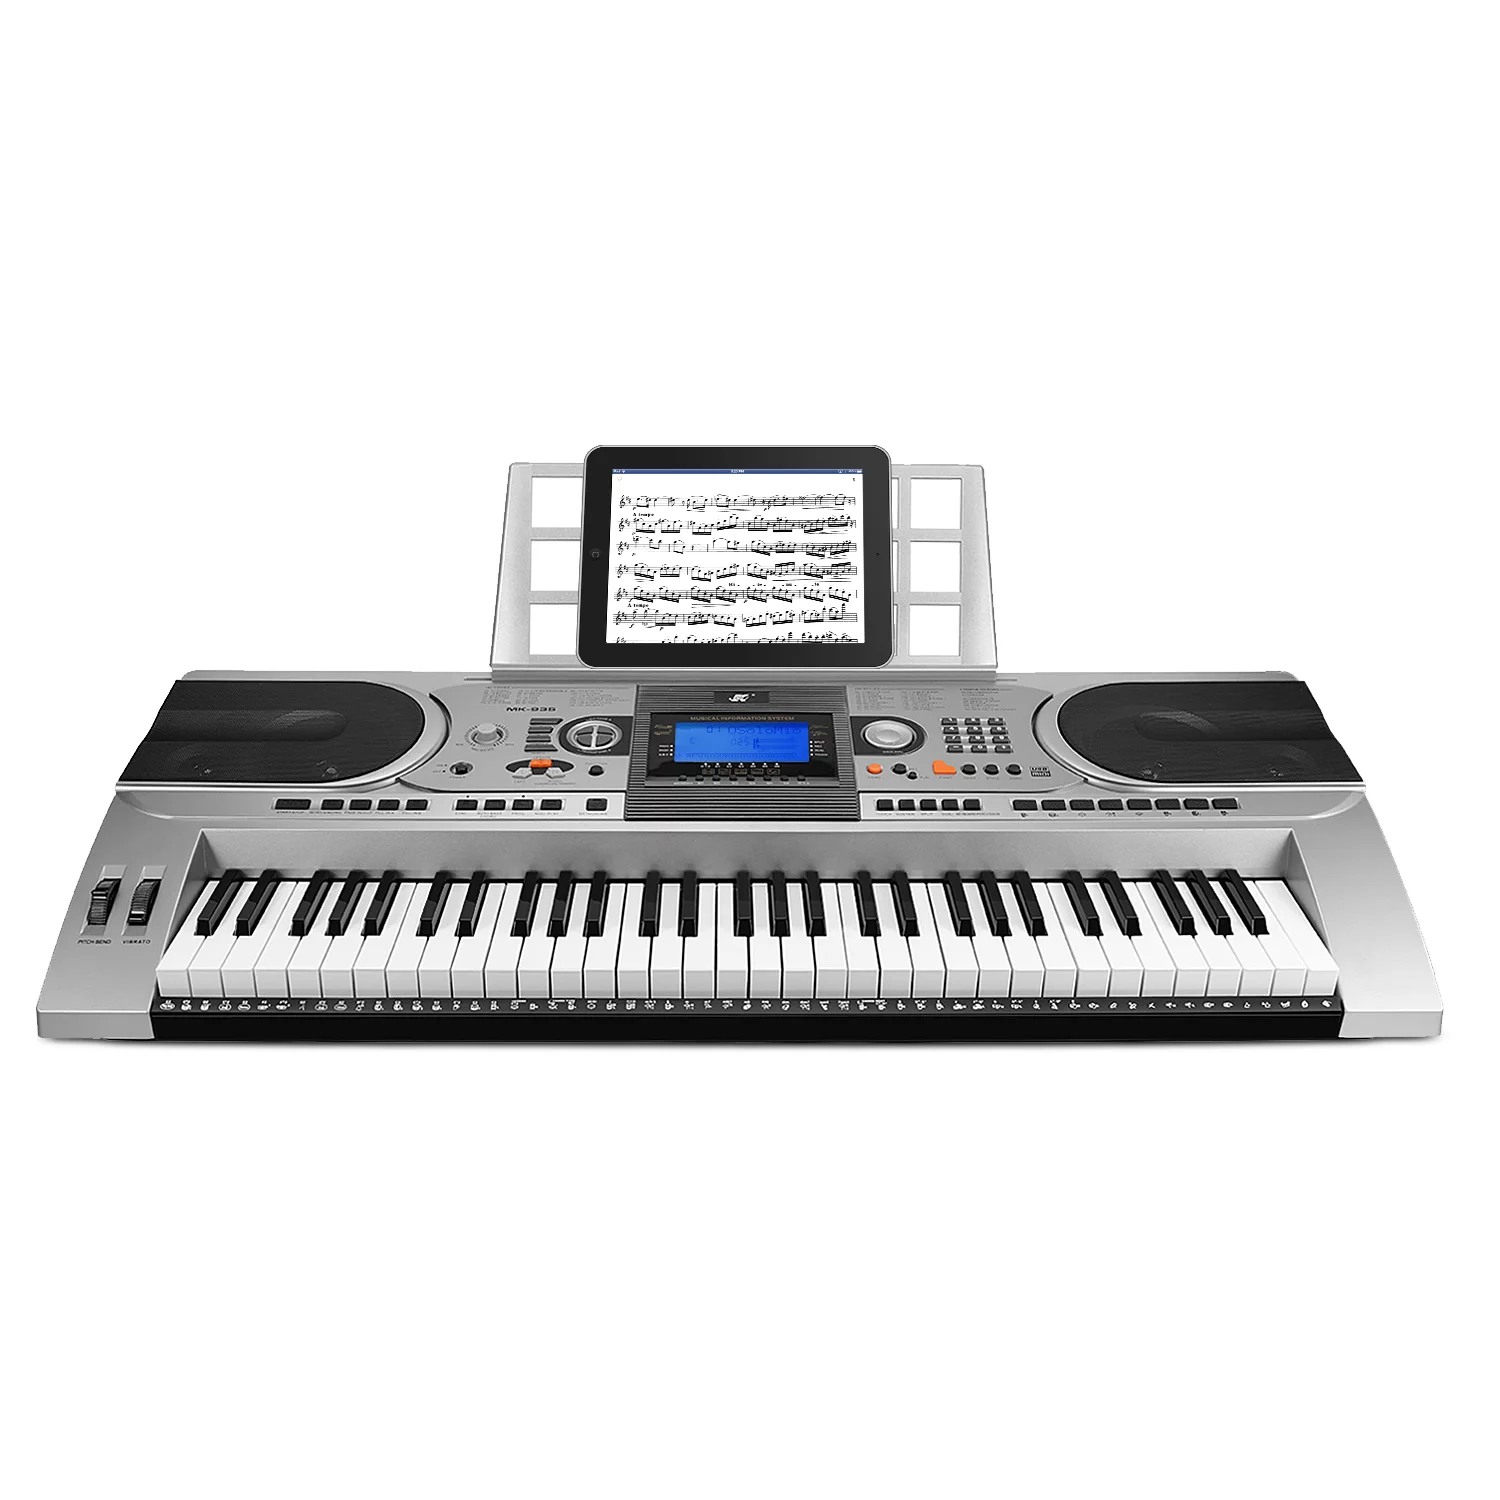